<a href="https://colab.research.google.com/github/itberrios/3D/blob/main/mars_challenge/MARS_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the MARS Challenge!**

### The [MARS challenge](https://blog.marsauto.com/introducing-the-mars-challenge-fc84c5afafbe) is a Computer Vision Task to predict vehicle speed using only camera frames.


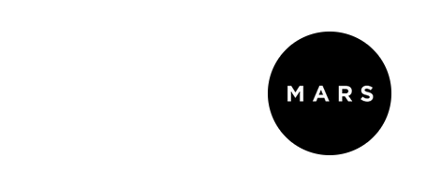

It was prepared by an automous trucking start-up called MARS as a way to identify potentially qualified candidates. The idea is to avoid a traditional whiteboard interview and instead provide a more challenging problem that requires an innate ability to solve complex problems.

<br>

### **Are you up for the challenge?** Let's get started!

## **Challenge Background**

This challenge consists of a trianing video with accompanying ego vehicle speeds at each frame. Along with a test video with no accompanying speeds. The challenge will involve predicting the true vehicle speed of the test frames.


## **Possible Approaches**
We can approach this any number of ways that we want to, but in this series we will use two different approaches.

The first approach will involve finding the Translation and Rotation of between each frame and then using those values to predict the vehicle speed. This is a two step approach. The first step will regress translation and rotation to find the best fit between two frames, the second step will be to use those values in a model that can predict the vehicl speed.

The second approach will involve predicting the dense optical flow between frames and using that value to regress the speed. This method will be end-to-end with a pre-trained deep neural network to predict the optical flow, followed by a convolutional neural network to regress the speed.

The third approach will also be an end-to-end approach, we will use a pre-trainind optical flow model and instead of predicting the optical flow from two frames and then regressing, we will regress the speed directly from the two frames without actually predicting the optical flow. In this case we will be able to simplify our model and utilize abstract representations learned by the model.

In [6]:
!wget https://marschallenge.s3.ap-northeast-2.amazonaws.com/train.mp4
!wget https://marschallenge.s3.ap-northeast-2.amazonaws.com/train.txt
!wget https://marschallenge.s3.ap-northeast-2.amazonaws.com/test.mp4

--2023-08-14 00:30:56--  https://marschallenge.s3.ap-northeast-2.amazonaws.com/train.mp4
Resolving marschallenge.s3.ap-northeast-2.amazonaws.com (marschallenge.s3.ap-northeast-2.amazonaws.com)... 52.219.146.54
Connecting to marschallenge.s3.ap-northeast-2.amazonaws.com (marschallenge.s3.ap-northeast-2.amazonaws.com)|52.219.146.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 450765182 (430M) [video/mp4]
Saving to: ‘train.mp4’

train.mp4           100%[===================>] 429.88M  16.6MB/s    in 28s     

2023-08-14 00:31:25 (15.3 MB/s) - ‘train.mp4’ saved [450765182/450765182]

--2023-08-14 00:31:25--  https://marschallenge.s3.ap-northeast-2.amazonaws.com/train.txt
Resolving marschallenge.s3.ap-northeast-2.amazonaws.com (marschallenge.s3.ap-northeast-2.amazonaws.com)... 52.219.204.50
Connecting to marschallenge.s3.ap-northeast-2.amazonaws.com (marschallenge.s3.ap-northeast-2.amazonaws.com)|52.219.204.50|:443... connected.
HTTP request sent, awaiting respon